In [2]:
import numpy as np

class LinearModel():
    def __init__(self, α=None, β=None): 
        self.α = α # these are the "parameters" of the model
        self.β = β if type(β) is np.ndarray else np.array([β]) # for the 1-predictor case in case user passes in a single value

    def fit(self, X,y):
        # ...? later we'll fill this in so that it calculates the best parameters, given the data
        pass
        
    def predict(self, X):
        return self.α + np.matmul(X, self.β) # returns ŷ

In [3]:
def mse(y, ŷ):
    return np.mean(np.square(y-ŷ))

In [6]:
from sklearn.datasets import make_regression
X,y,coef = make_regression(n_features=1, noise=50, bias=0, coef=True)

In [8]:
import pandas as pd

def lin_reg_mse_loss(θ):
    m = LinearModel(*θ) # same as α=θ[0], β=θ[1]
    ŷ = m.predict(X)
    return mse(y,ŷ)

from itertools import product
αs = np.arange(-100, 100, 5)
βs = np.arange(-100, 100, 5)
params = list(product(αs, βs))
L = [None for i in range(len(params))]
for i, (α, β) in enumerate(params):
    L[i] = lin_reg_mse_loss([α, β])
    
a,b = zip(*params)

loss_df = pd.DataFrame({'a':a, 'b':b, 'L':L})
data_df = pd.DataFrame({'y':y, 'x':X[:,0]})

In [10]:
import rpy2
%load_ext rpy2.ipython

R[write to console]: ── Attaching packages ────────────────────────────────── tidyverse 1.2.1.9000 ──

R[write to console]: ✔ ggplot2 3.2.1          ✔ purrr   0.3.2     
✔ tibble  2.1.3          ✔ dplyr   0.8.3     
✔ tidyr   0.8.3.9000     ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.3.0     

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

R[write to console]: Loading required package: viridisLite

R[write to console]: Saving 6.67 x 6.67 in image



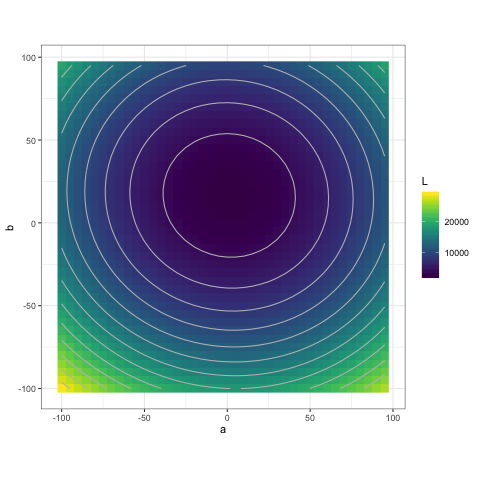

In [11]:
%%R -i loss_df
library(tidyverse)
library(viridis)

plot = loss_df %>%
ggplot(aes(x=a,y=b)) +
    geom_raster(aes(fill=L)) + 
    geom_contour(aes(z=L), color='grey') +
    scale_fill_viridis() +
    theme_bw() + 
    coord_fixed()
ggsave('loss.png', plot, device='png')
plot

R[write to console]: Saving 6.67 x 6.67 in image



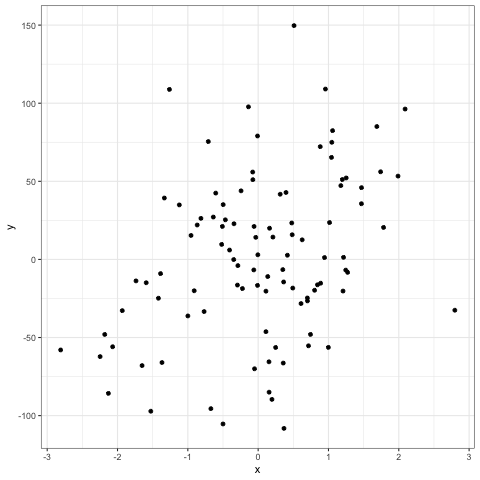

In [13]:
%%R -i data_df
library(tidyverse)
library(viridis)

plot = data_df %>%
ggplot(aes(x=x,y=y)) +
    geom_point() + 
    theme_bw()  
#     geom_abline(intercept=25, slope=50, color='red') 
#     geom_abline(intercept=0, slope=-25, color='red') 
#     geom_abline(intercept=75, slope=25, color='red')
ggsave('reg.png', plot, device='png')
plot